In [97]:
import os
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import shutil

In [98]:
df = pd.read_excel('./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset.xlsx')

df.head()

,File Name,Time Stamp,Storage Group,Sample,Day of Experiment,Ripening Index Classification
0,T20_d01_001_a_1,2022-04-04 18:56:55,T20,1,1,1
1,T20_d01_001_b_1,2022-04-04 18:57:03,T20,1,1,1
2,T20_d02_001_a_1,2022-04-05 14:16:21,T20,1,2,1
3,T20_d02_001_b_1,2022-04-05 14:16:46,T20,1,2,1
4,T20_d03_001_a_2,2022-04-06 15:08:50,T20,1,3,2


In [99]:
df.query('`File Name` == "T10_d01_002_b_1"')

,File Name,Time Stamp,Storage Group,Sample,Day of Experiment,Ripening Index Classification
23,T10_d01_002_b_1,2022-04-04 11:00:50,T10,2,1,1


In [115]:
labels = {
    1 : "Underripe",
    2 : "Breaking",
    3 : "Ripe (First Stage)",
    4 : "Ripe (Second Stage)",
    5 : 'Overripe'
}

labels

{1: 'Underripe',
 2: 'Breaking',
 3: 'Ripe (First Stage)',
 4: 'Ripe (Second Stage)',
 5: 'Overripe'}

In [101]:
PATH = './Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset'

os.listdir(PATH)

['Breaking',
 '.DS_Store',
 'Underripe',
 'Ripe (First Stage)',
 'Overripe',
 'Ripe (Second Stage)']

In [102]:
def concat_path(path):
    return str(os.path.join(PATH, f'{path}.jpg'))

def concat_target_path(label, path):
    return str(os.path.join(PATH, labels[label], f'{path}.jpg'))


print(concat_target_path(1, 'T20_d02_212_b_1'))
concat_path(df['File Name'][0])

./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/Underripe/T20_d02_212_b_1.jpg


'./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T20_d01_001_a_1.jpg'

In [104]:
# img = cv.imread(concat_path(df['File Name'][0]))

# plt.imshow(img)

In [ ]:
for i in range(len(df)):
    file_name = df['File Name'][i]
    label = df['Ripening Index Classification'][i]
    
    src_img = concat_path(file_name)
    target_img = concat_target_path(label, file_name)

    # Ensure the target directory exists
    target_dir = os.path.dirname(target_img)
    os.makedirs(target_dir, exist_ok=True)

    # Only move if source file exists
    if os.path.exists(src_img):
        shutil.move(src_img, target_img)
    else:
        print(f"File not found: {src_img}")

File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/Tam_d02_052_a_2.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/Tam_d02_052_b_2.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T10_d04_065_a_3.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T10_d04_065_b_3.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T10_d02_072_a_1.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T10_d02_072_b_1.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T20_d02_141_a_2.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T20_d02_141_b_2.jpg
File not found: ./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset/T20_d03_192_a_1.jpg
File not found: ./Hass Avocado Ripening Photog

In [105]:
NEW_PATH = "./Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset"

count = {
    labels[1]: 0,
    labels[2]: 0,
    labels[3]: 0,
    labels[4]: 0,
    labels[5]: 0,
}

for i in os.listdir(NEW_PATH):
    if i == ".DS_Store":
        continue
    else:
        count[i] = (len(os.listdir(os.path.join(NEW_PATH, i))))

count

{'Underripe': 3568,
 'Breaking': 2228,
 'Ripe (First Stage)': 2756,
 'Ripe (Second Stage)': 3294,
 'Overripe': 2864}

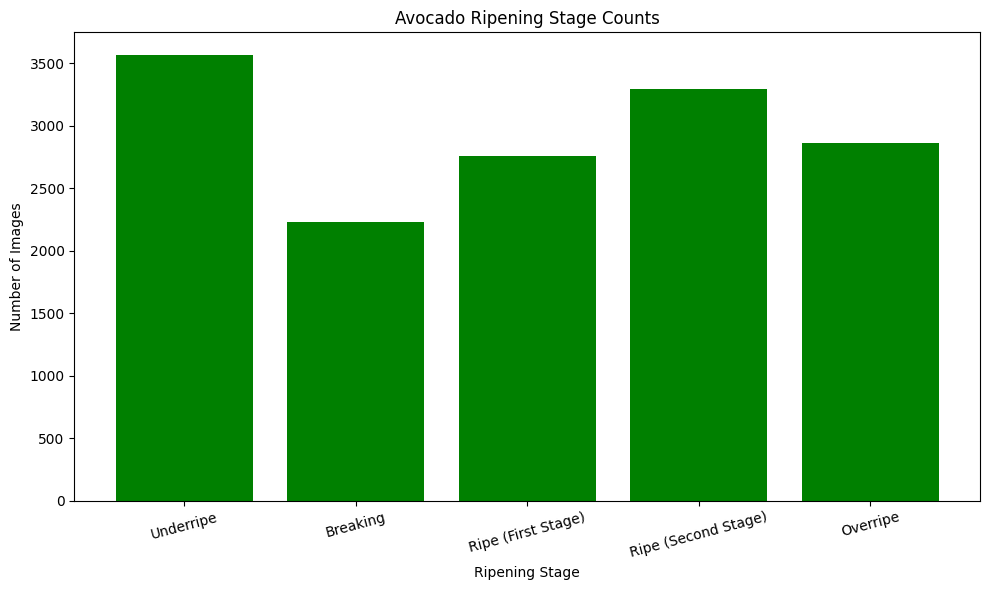

In [106]:
# Prepare data
labels = list(count.keys())
values = list(count.values())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='green')
plt.title('Avocado Ripening Stage Counts')
plt.xlabel('Ripening Stage')
plt.ylabel('Number of Images')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

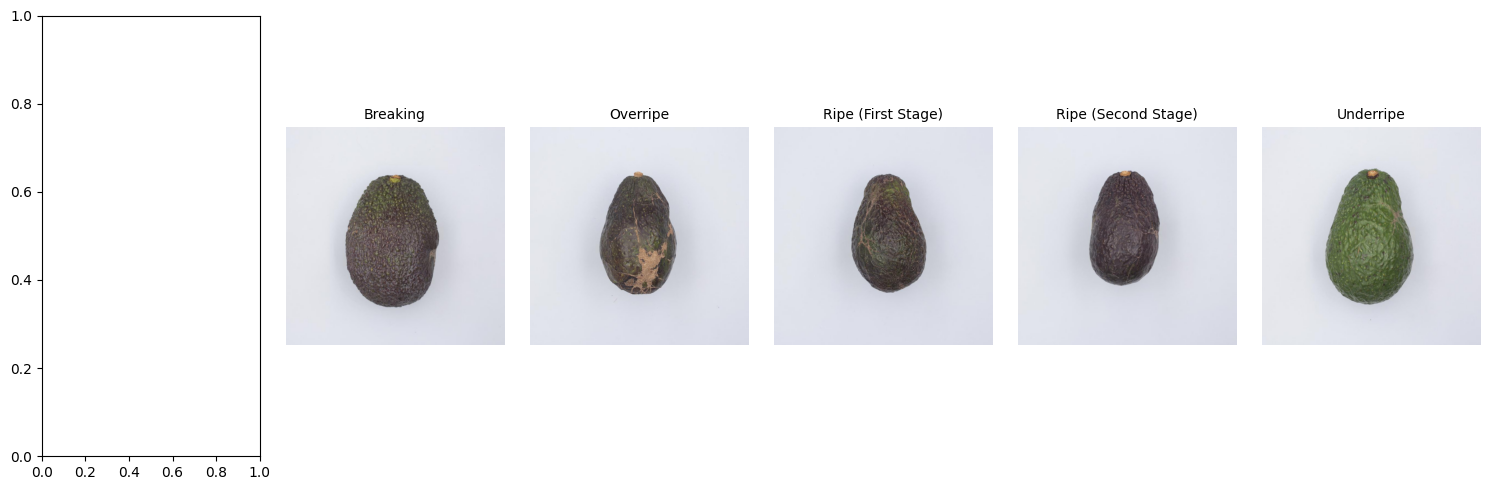

In [109]:
fig, axs = plt.subplots(1, len(os.listdir(NEW_PATH)), figsize=(15, 5))

# Loop through each folder
for idx, folder in enumerate(sorted(os.listdir(NEW_PATH))):
    folder_path = os.path.join(NEW_PATH, folder)
    
    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        
        if images:
            img_path = os.path.join(folder_path, images[0])
            img = cv.imread(img_path)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            axs[idx].imshow(img)
            axs[idx].axis('off')
            axs[idx].set_title(folder, fontsize=10)

plt.tight_layout()
plt.show()


In [112]:
# split into train and test

from sklearn.model_selection import train_test_split

# Base paths
BASE_DIR = "Hass Avocado Ripening Photographic Dataset/Avocado Ripening Dataset"
TRAIN_DIR = "train"
TEST_DIR = "test"

# Ensure output folders exist
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

# Loop through each label folder
for label in os.listdir(BASE_DIR):
    label_path = os.path.join(BASE_DIR, label)
    if not os.path.isdir(label_path):
        continue

    # List all image files
    image_files = [f for f in os.listdir(label_path) if f.lower().endswith(('.jpg', '.png'))]

    # Split images
    train_files, test_files = train_test_split(image_files, test_size=0.1, random_state=42)

    # Make label subfolders in train/test
    os.makedirs(os.path.join(TRAIN_DIR, label), exist_ok=True)
    os.makedirs(os.path.join(TEST_DIR, label), exist_ok=True)

    # Copy train files
    for file in train_files:
        shutil.copy(os.path.join(label_path, file), os.path.join(TRAIN_DIR, label, file))

    # Copy test files
    for file in test_files:
        shutil.copy(os.path.join(label_path, file), os.path.join(TEST_DIR, label, file))

print("Dataset split complete. Train/Test folders created with balanced classes.")


Dataset split complete. Train/Test folders created with balanced classes.


In [117]:
NEW_PATH = "./test/"

train_count = {
    labels[1]: 0,
    labels[2]: 0,
    labels[3]: 0,
    labels[4]: 0,
    labels[5]: 0,
}

for i in os.listdir(NEW_PATH):
    if i == ".DS_Store":
        continue
    else:
        count[i] = (len(os.listdir(os.path.join(NEW_PATH, i))))

count

{'Underripe': 357,
 'Breaking': 223,
 'Ripe (First Stage)': 276,
 'Ripe (Second Stage)': 330,
 'Overripe': 287}

In [118]:
NEW_PATH = "./train/"

train_count = {
    labels[1]: 0,
    labels[2]: 0,
    labels[3]: 0,
    labels[4]: 0,
    labels[5]: 0,
}

for i in os.listdir(NEW_PATH):
    if i == ".DS_Store":
        continue
    else:
        count[i] = (len(os.listdir(os.path.join(NEW_PATH, i))))

count

{'Underripe': 3211,
 'Breaking': 2005,
 'Ripe (First Stage)': 2480,
 'Ripe (Second Stage)': 2964,
 'Overripe': 2577}